In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [61]:
train_original = train.copy()
test_original = test.copy()

In [62]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [65]:
train.shape , test.shape

((614, 13), (367, 12))

In [66]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [68]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# UNIVARIATE ANALYSIS

In [69]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [70]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

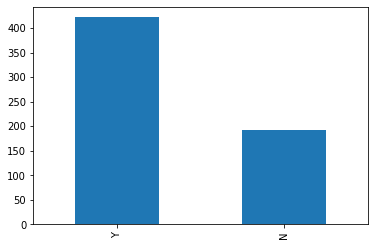

In [71]:
train['Loan_Status'].value_counts().plot.bar()

## CATEGORICAL VARIABLES

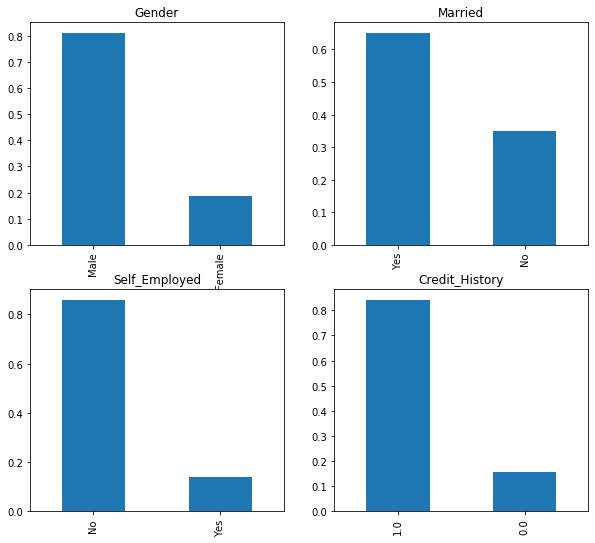

In [72]:
plt.figure()
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(10,9))
plt.subplot(2,2,2)
train['Married'].value_counts(normalize=True).plot.bar(title='Married',figsize=(10,9))
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',figsize=(10,9))
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',figsize=(10,9))


## ORDINAL VARIABLES

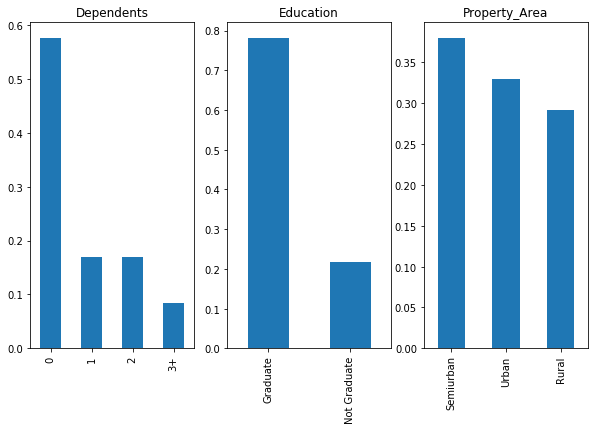

In [73]:
plt.figure()
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents',figsize=(10,6))
plt.subplot(1,3,2)
train['Education'].value_counts(normalize=True).plot.bar(title='Education',figsize=(10,6))
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area',figsize=(10,6))


## NUMERICAL VARIABLES

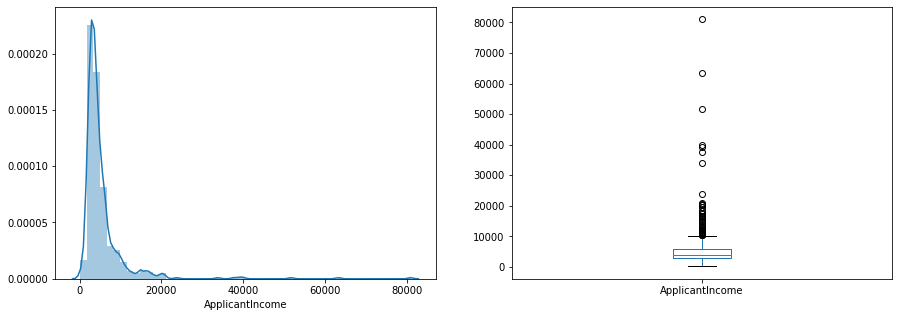

In [74]:
plt.figure()
plt.subplot(1,2,1)
sns.distplot(train['ApplicantIncome'])
plt.subplot(1,2,2)
train['ApplicantIncome'].plot.box(figsize=(15,5))


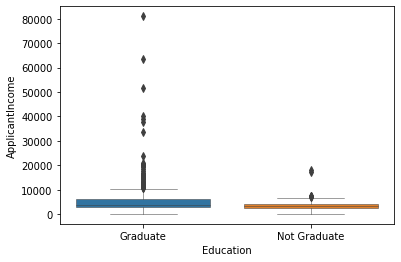

In [75]:
sns.boxplot('Education','ApplicantIncome',data=train,linewidth=0.5)

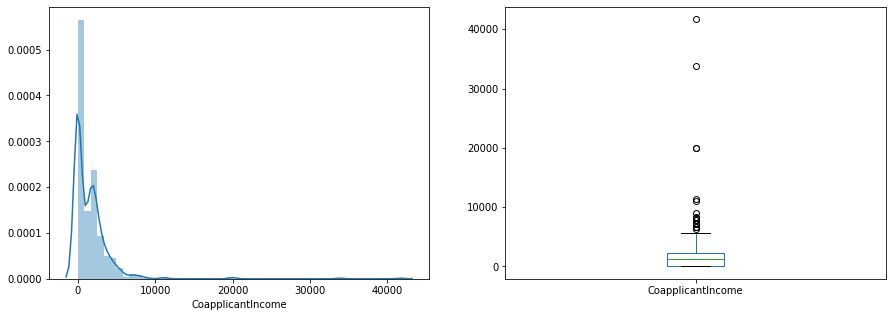

In [76]:
plt.figure()
plt.subplot(1,2,1)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(1,2,2)
train['CoapplicantIncome'].plot.box(figsize=(15,5))


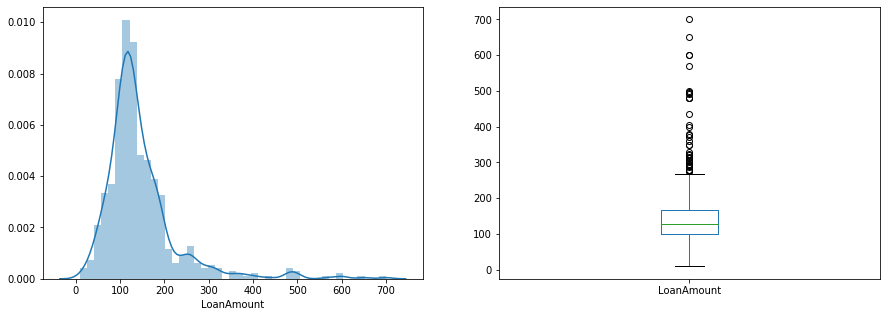

In [77]:
plt.figure()
plt.subplot(1,2,1)
sns.distplot(train['LoanAmount'])
plt.subplot(1,2,2)
train['LoanAmount'].plot.box(figsize=(15,5))


# BIVARIATE ANALYSIS

## CATEGORICAL INDEPENDENT VARIABLE vs TARGET VARIABLE

In [78]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])


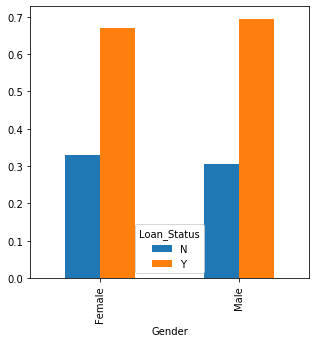

In [79]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(5,5))

In [80]:
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])

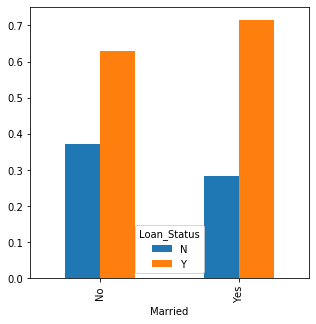

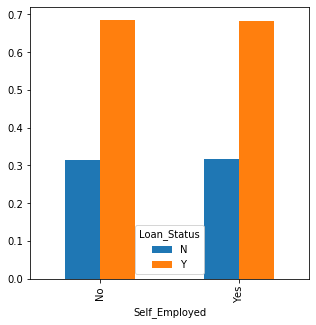

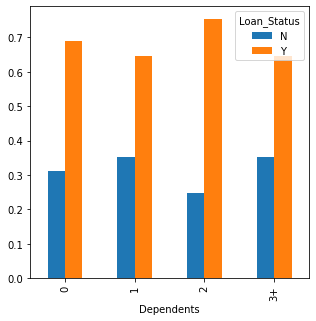

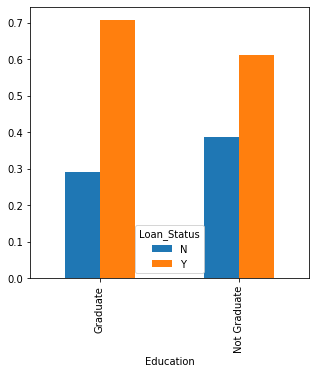

In [81]:
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(5,5))

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(5,5))

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(5,5))

Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(5,5))


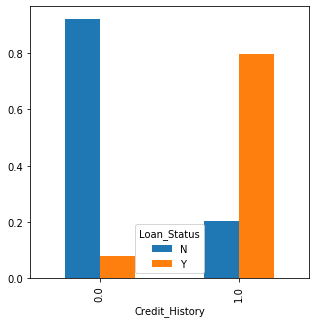

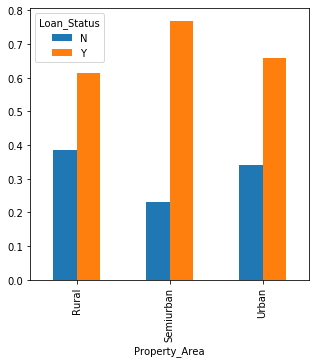

In [82]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])


Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(5,5))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(5,5))



## NUMERICAL INDEPENDENT VARIABLE vs TARGET VARIABLE

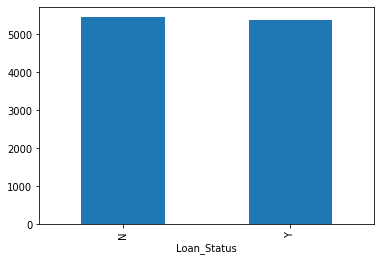

In [83]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

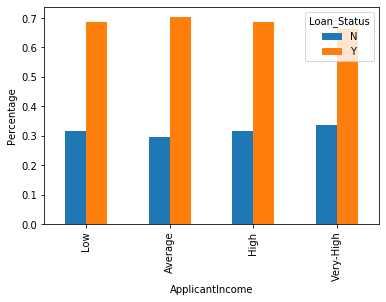

In [84]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very-High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar')
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

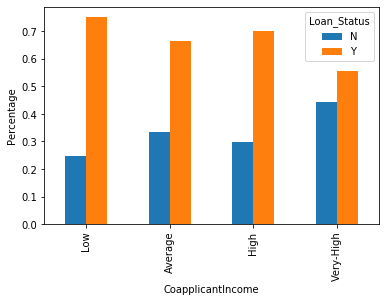

In [85]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very-High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)

Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

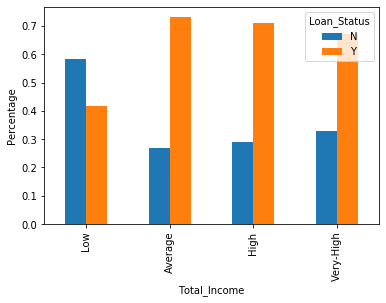

In [86]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very-High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels = group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar')
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

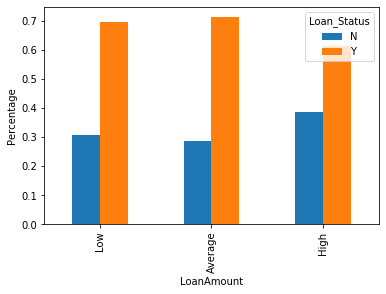

In [87]:

bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels = group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar')
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [88]:
train = train.drop(['Income_bin','LoanAmount_bin','Coapplicant_Income_bin','Total_Income','Total_Income_bin'],axis=1)

In [89]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [90]:
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

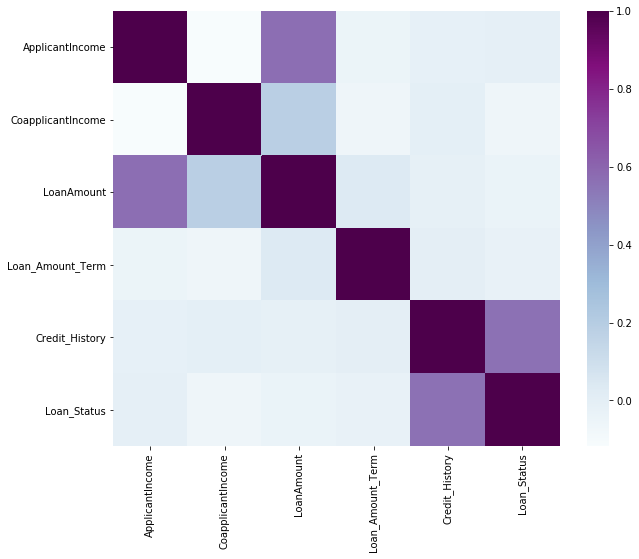

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),cmap='BuPu')

# MISSING VALUES and OUTLIER TREATMENT

## 1.MISSING VALUES

To fill issing values we can consider following methods :

**For Numerical Variables :** imputation using mean/median.

**For Categorical Variables :** imputation using mode.

### FOR TRAIN DATA

In [92]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [94]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [95]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [96]:
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

In [97]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### FOR TEST DATA

In [98]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [99]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [100]:
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)

In [101]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## 2.OUTLIER TREATMENT

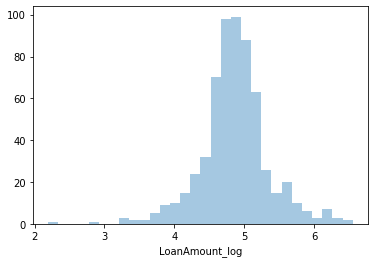

In [102]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
sns.distplot(train['LoanAmount_log'],kde=False,bins=30)

In [103]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# MODEL BUILDING

## CREATING FEATURE AND TARGET VARIABLES FOR MODEL

In [104]:
# Note : We'll drop Loan_ID as it doesn't effect on Loan_Status.

train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [105]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [106]:
X = pd.get_dummies(X,drop_first=True)
train = pd.get_dummies(train,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## MODEL TRAINING and PREDICTION

In [108]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [109]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
lm_pred = lm.predict(X_test)

## Evaluation

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lm_pred))

              precision    recall  f1-score   support

           0       0.85      0.37      0.52        46
           1       0.82      0.98      0.89       139

    accuracy                           0.83       185
   macro avg       0.84      0.67      0.70       185
weighted avg       0.83      0.83      0.80       185



**We'll now just make predictions for test dataset**

In [112]:
test_pred = lm.predict(test)

In [113]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [114]:
submission['Loan_Status'] = test_pred
submission['Loan_ID'] = test_original['Loan_ID']

In [115]:
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [116]:
submission.to_csv('Loan_Prediction.csv',index=False)